<a href="https://colab.research.google.com/github/hadinursalim/EVDA/blob/main/All_Trump_Twitter_Insults.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Datasets All Trump's Twitter insults (2015-2021) From Kaggle**

**Dataset**

Dataset diambil dari kaggle pada link dibawah ini:

https://www.kaggle.com/datasets/ayushggarg/all-trumps-twitter-insults-20152021?select=trump_insult_tweets_2014_to_2021.csv

In [ ]:
# Install Kaggle

!pip install -U -q kaggle

In [ ]:
# Upload Authentication Kaggle

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hadinursalim11","key":"1ac8d13e97250ef30cfb483c3cc50e94"}'}

In [ ]:
# Persiapan Authentication Kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Download Data

!kaggle datasets download ayushggarg/all-trumps-twitter-insults-20152021

  0% 0.00/581k [00:00<?, ?B/s]
100% 581k/581k [00:00<00:00, 49.1MB/s]


In [ ]:
!unzip /content/all-trumps-twitter-insults-20152021.zip

Archive:  /content/all-trumps-twitter-insults-20152021.zip
  inflating: trump_insult_tweets_2014_to_2021.csv  


# **Libraries dan Moduls**

In [ ]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from PIL import Image
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

# **Datasets**

In [ ]:
# Membaca Data

df = pd.read_csv('../content/trump_insult_tweets_2014_to_2021.csv')

In [ ]:
df.head()

,Unnamed: 0,date,target,insult,tweet
0,1,2014-10-09,thomas-frieden,fool,"Can you believe this fool, Dr. Thomas Frieden ..."
1,2,2014-10-09,thomas-frieden,DOPE,"Can you believe this fool, Dr. Thomas Frieden ..."
2,3,2015-06-16,politicians,all talk and no action,Big time in U.S. today - MAKE AMERICA GREAT AG...
3,4,2015-06-24,ben-cardin,It's politicians like Cardin that have destroy...,Politician @SenatorCardin didn't like that I s...
4,5,2015-06-24,neil-young,total hypocrite,"For the nonbeliever, here is a photo of @Neily..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10360 entries, 0 to 10359
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10360 non-null  int64 
 1   date        10360 non-null  object
 2   target      10358 non-null  object
 3   insult      10360 non-null  object
 4   tweet       10360 non-null  object
dtypes: int64(1), object(4)
memory usage: 404.8+ KB


# **Preprocessing data**

In [ ]:
# Let's drop the "Unnamed: 0"
df.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10360 entries, 0 to 10359
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    10360 non-null  object
 1   target  10358 non-null  object
 2   insult  10360 non-null  object
 3   tweet   10360 non-null  object
dtypes: object(4)
memory usage: 323.9+ KB


In [ ]:
# Shape of dataframe
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns")

There are 10360 rows and 4 columns


In [ ]:
# Find missing values
df.isnull().sum()

date      0
target    2
insult    0
tweet     0
dtype: int64

In [ ]:
# we see that there are 2 missing values on target column, let's drop missing values
df.dropna(inplace=True)

In [ ]:
# let's check the datatypes of every column
df.dtypes

date      object
target    object
insult    object
tweet     object
dtype: object

**Data Manipulation**

Time Series columns

In [ ]:
from datetime import date
df['date']=pd.to_datetime(df['date'])
#====
L = ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter']
df = df.join(pd.concat((getattr(df['date'].dt, i).rename(i) for i in L), axis=1))
df['year'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


2020    2712
2019    2425
2018    1777
2016    1539
2017    1119
2015     757
2021      27
2014       2
Name: year, dtype: int64

Count Hashtags in Tweets

In [ ]:
df['hash'] = df['tweet'].apply(lambda word:word.count('#'))

Count Mentions in Tweets

In [ ]:
df['men'] = df['tweet'].apply(lambda word:word.count('@'))

Tweet Length Characters & Class

In [ ]:
df['tweet_length_ch']=df['tweet'].apply(lambda x:len(x))
df=df.loc[df['tweet_length_ch']<=280]

#=== 
df['tweet_length']=df['tweet_length_ch'].apply(lambda x:'short' if x <=130 else 'long')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Media

In [ ]:
df['med'] = df['tweet'].apply(lambda word:word.count('https://t.co/'))
df['med'].unique()

array([0, 1, 2])

In [ ]:
df_copy=df.copy()
df_copy2=df.copy()

# **EDA**

**Check Tweets Length**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


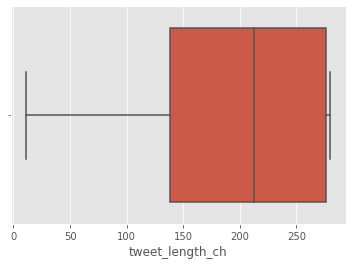

In [ ]:
sns.boxplot(df['tweet_length_ch'])

**Tweet Length Distribution**

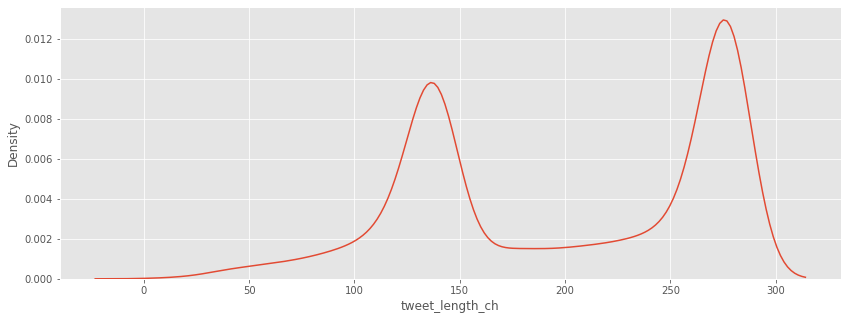

In [ ]:
plt.figure(figsize=(14,5))
iris = df_copy['tweet_length_ch']
sns.kdeplot(data=iris)

**Most Targets in a Tweet**

In [ ]:
insult_tw=df_copy.groupby('tweet',as_index=False).agg({'insult':'count'})
insult_tw.describe()

,insult
count,5607.000000
mean,1.821830
std,1.161811
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,16.000000


In [ ]:
insult_tw_75 = insult_tw.loc[insult_tw['insult']==16]
print('Most tweet have insulted Targets is : ',insult_tw_75.values)

Most tweet have insulted Targets is :  [['The Fake News Networks, those that knowingly have a sick and biased AGENDA, are worried about the competition and quality of Sinclair Broadcast. The ‘Fakers’ at CNN, NBC, ABC & CBS have done so much dishonest reporting that they should only be allowed to get awards for fiction!'
  16]]


**The Media**

Most insult word with The Media was :  Fake News    315
Name: insult, dtype: int64


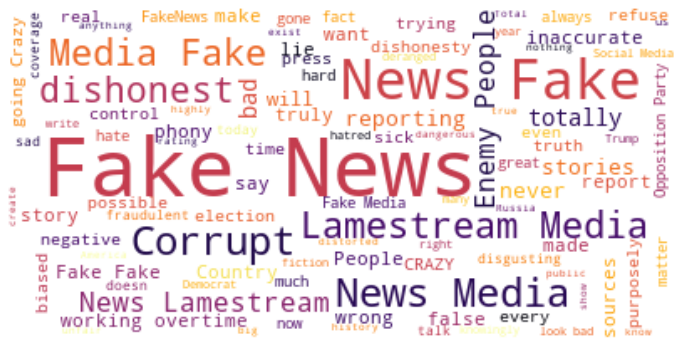

In [ ]:
df_media=df_copy.loc[df_copy['target']=='the-media']
print('Most insult word with The Media was : ',df_media['insult'].value_counts()[:1])
#==============
tweet_All = " ".join(insul for insul in df_media.insult)


fig, ax = plt.subplots(1, 1, figsize  = (12,10))

wordcloud_ALL = WordCloud(max_font_size=50, max_words=100,colormap="inferno", background_color="white").generate(tweet_All)

ax.imshow(wordcloud_ALL, interpolation='bilinear')

ax.axis('off');

**Joe Biden**

Most insult word with joe biden was :  Sleepy Joe    125
Name: insult, dtype: int64


(-0.5, 399.5, 199.5, -0.5)

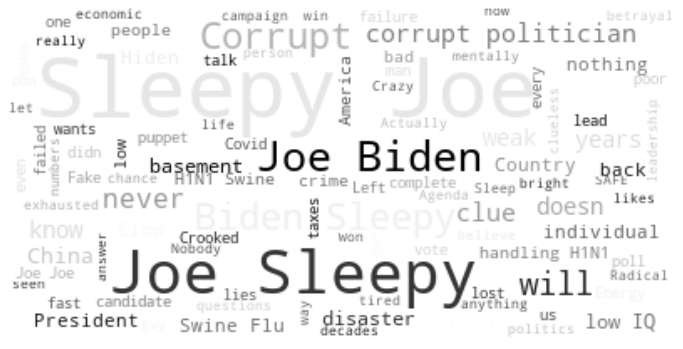

In [ ]:
df_bide=df_copy.loc[df_copy['target']=='joe-biden']
print('Most insult word with joe biden was : ',df_bide['insult'].value_counts()[:1])
#==============
tweet_All = " ".join(insul for insul in df_bide.insult)


fig, ax = plt.subplots(1, 1, figsize  = (12,10))

wordcloud_ALL = WordCloud(max_font_size=50, max_words=100,colormap='gray', background_color="white").generate(tweet_All)

ax.imshow(wordcloud_ALL, interpolation='bilinear')

ax.axis('off')

**Hillary-Clinton**

Most insult word with hillary-clinton was :  Crooked    264
Name: insult, dtype: int64


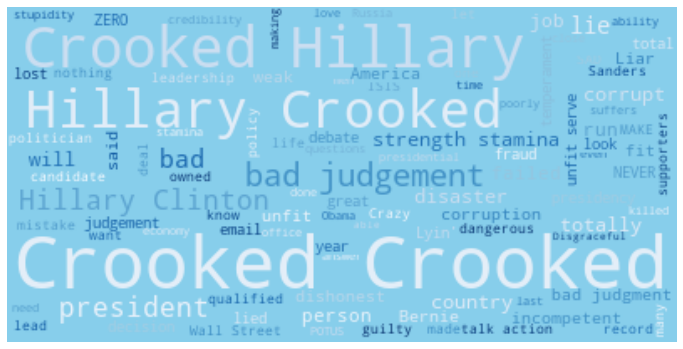

In [ ]:
df_hc=df_copy.loc[df_copy['target']=='hillary-clinton']
print('Most insult word with hillary-clinton was : ',df_hc['insult'].value_counts()[:1])
#==============
tweet_All = " ".join(insul for insul in df_hc.insult)


fig, ax = plt.subplots(1, 1, figsize  = (12,10))

wordcloud_ALL = WordCloud(max_font_size=50, max_words=100,colormap="Blues", background_color="skyblue").generate(tweet_All)

ax.imshow(wordcloud_ALL, interpolation='bilinear')

ax.axis('off');

**Russia-Trump**

Most insult word with df_trump_russia was :  Witch Hunt    56
Name: insult, dtype: int64


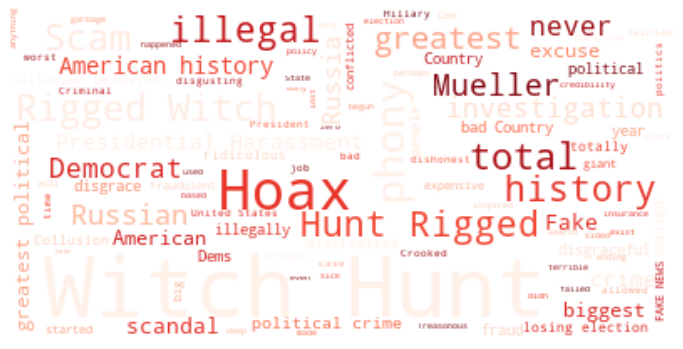

In [ ]:
df_trump_russia =df_copy.loc[df_copy['target']=='trump-russia']
print('Most insult word with df_trump_russia was : ',df_trump_russia['insult'].value_counts()[:1])
#==============

tweet_All = " ".join(insul for insul in df_trump_russia.insult)

fig, ax = plt.subplots(1, 1, figsize  = (12,10))
wordcloud_ALL = WordCloud(max_font_size=50,colormap="Reds", max_words=100, background_color="white").generate(tweet_All)

ax.imshow(wordcloud_ALL, interpolation='bilinear')

ax.axis('off');

# **Data Visualization( EDA )**

**Tweet Length Class - Pie Chart**

<Figure size 720x504 with 0 Axes>

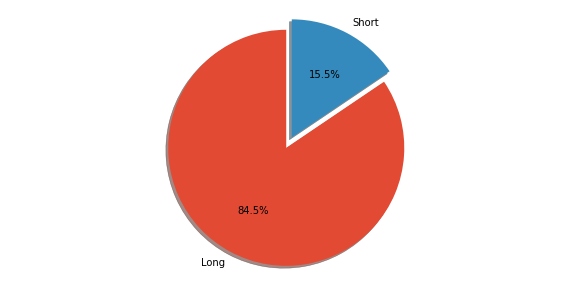

In [ ]:
plt.figure(figsize=(10,7))
labels = 'Long', 'Short'
sizes = [8748,1610]
explode = (0.1, 0)  
plt.figure(figsize=(10,5))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90);
plt.axis('equal');  

**Mentions in Tweet Length**

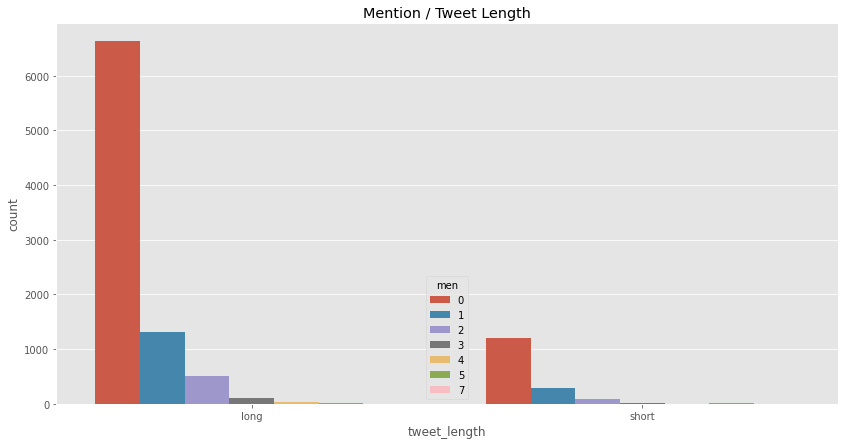

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(data=df,x='tweet_length',hue='men').set_title('Mention / Tweet Length');

**Media in tweets**

In [ ]:
plt.figure(figsize=(14,7))
No_Media= len(df[df['med']==0])
Media = len(df[df['med']>0])
Platform = ['NoMedia','Media']
Count = [No_Media,Media]
#====
fig = px.pie(names = Platform,
             values = Count,
             title='Media/No Media',
            color_discrete_sequence = px.colors.sequential.Agsunset)
fig.update_traces(textposition='inside', textinfo='percent+label')

<Figure size 1008x504 with 0 Axes>

**3D Length-Hashtag-Mentions**

X = Hashtag , Y = Mention , Z = Tweet Length

In [ ]:
d3 = df_copy[['tweet_length_ch','men','hash','tweet_length']]
hashtag=df_copy['hash'].values
mention=df_copy['men'].values
length=df_copy['tweet_length_ch'].values
L= df_copy['tweet_length'].values
trace = go.Scatter3d(x=hashtag,y=mention,z=length,mode='markers',marker=dict(size=5,color="crimson"))
fig=go.Figure(data=[trace])
fig.show()

**Top 10 Targets**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



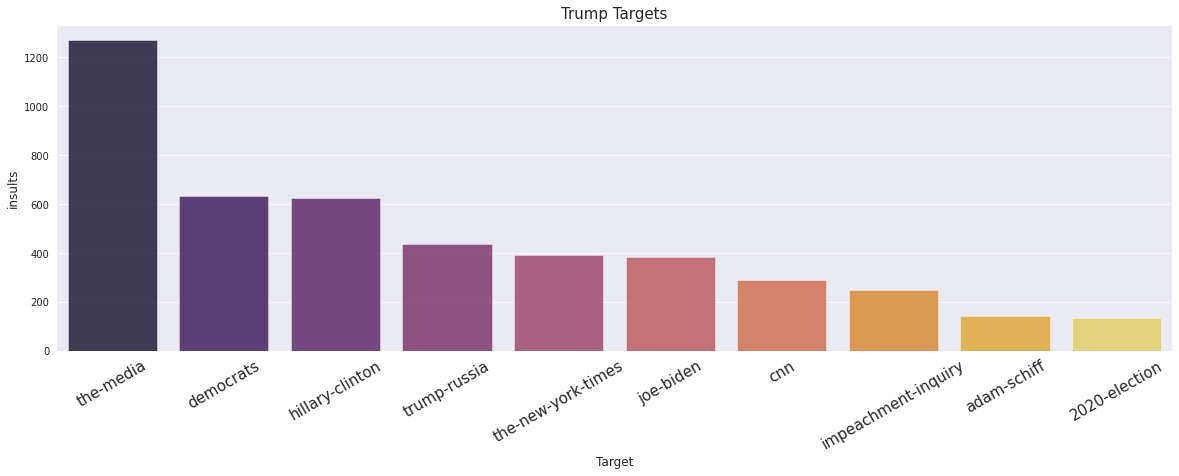

In [ ]:
r_op =df['target'].value_counts()
r_op = r_op[:10]
sns.set_style("darkgrid")
plt.figure(figsize=(20,6));
r_op_vis = sns.barplot(r_op.index, r_op.values, alpha=0.8,palette="inferno");
plt.title('Trump Targets',fontsize=15);
plt.ylabel('insults', fontsize=12);
plt.xlabel('Target', fontsize=12);
r_op_vis.set_xticklabels(rotation=30,labels=r_op.index,fontsize=15);
plt.show();

**Most Target People by year**

In [ ]:
from IPython.core.display import HTML
HTML('''<div class="flourish-embed flourish-chart" data-src="visualisation/5060515"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

**Most insults appears**

(-0.5, 399.5, 199.5, -0.5)

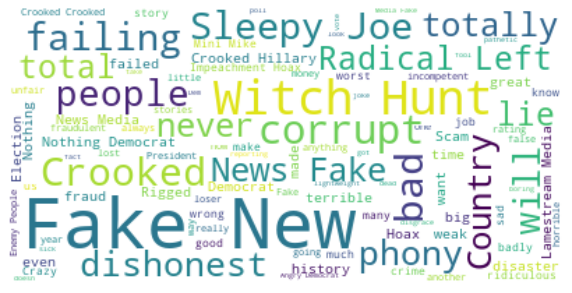

In [ ]:
tweet_All = " ".join(insul for insul in df.insult)


fig, ax = plt.subplots(1, 1, figsize  = (10,10))

wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)

ax.imshow(wordcloud_ALL, interpolation='bilinear')

ax.axis('off')

In [ ]:
dftime = df.groupby('year',as_index=False).agg({'insult':'count'}).reset_index()
px.line(x=dftime['year'],y=dftime['insult'],title='insult by year')

In [ ]:
dftime_dw = df.groupby('dayofweek',as_index=False).agg({'insult':'count'}).reset_index()
px.line(x=dftime_dw['dayofweek'],y=dftime_dw['insult'],title='insult by Daysofweek')

In [ ]:
tweets = df['tweet'].drop_duplicates()

In [ ]:
all_sentences = []

for word in tweets:
    all_sentences.append(word)

all_sentences

lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)

**Removing Punctuation**

In [ ]:
import re

lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

**Gettig Words roots**

In [ ]:
from nltk.stem.snowball import SnowballStemmer
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))

**Top Mention Keywords**

In [ ]:
import spacy.cli

spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [ ]:
stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

In [ ]:
df = pd.DataFrame(stem2)
df = df[0].value_counts()

In [ ]:
df = df[:20,]
#== 
px.bar(df, x=df.values,y= df.index, color=df.index, height=500)

**Top Mention Organizations**

In [ ]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
#====== 
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))
#======
nlp = spacy.load('en_core_web_sm') 
nlp.max_length = 2000000000000
#=====
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()

In [ ]:
df = df7[:20,]
plt.figure(figsize=(10,5))
px.bar(df, x=df.values,y= df.index, color=df.index, height=500)

<Figure size 720x360 with 0 Axes>

**Top mention People**

In [ ]:
nlp = spacy.load('en_core_web_sm') 
nlp.max_length = 2000000000000

str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df10 = pd.DataFrame(label, columns = ['Word','Entity'])

df10 = df10.where(df10['Entity'] == 'PERSON')

df11 = df10['Word'].value_counts()

In [ ]:
df = df11[:20,]

plt.figure(figsize=(10,5))

df = df11[:20,]
plt.figure(figsize=(10,5))
px.bar(df, x=df.values,y= df.index, color=df.index, height=500)

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

# **Sentiment Analysis**

**Removing characters**

In [ ]:
features=tweets.values
#=== 
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the Http: urls
    processed_feature = re.sub('(https?://\S+)', '', str(features[sentence]))
    
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', processed_feature)

    # Remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

**Adding Subjectivity & Polarity**

In [ ]:
df3=pd.DataFrame()
df3['Tweets']=processed_features
#=======
from textblob import TextBlob
from wordcloud import WordCloud
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df3['Subjectivity'] = df3['Tweets'].apply(getSubjectivity)
df3['Polarity'] = df3['Tweets'].apply(getPolarity)

**Sentiment Analysis**

In [ ]:
#Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df3['Analysis'] = df3['Polarity'].apply(getAnalysis)
df3

,Tweets,Subjectivity,Polarity,Analysis
0,can you believe this fool dr thomas frieden of...,0.000000,0.000000,Neutral
1,big time in s today make america great again p...,0.237500,0.187500,Positive
2,politician senatorcardin didn like that said b...,0.000000,0.000000,Neutral
3,for the nonbeliever here is photo of neilyoung...,0.750000,0.000000,Neutral
4,neilyoung song rockin in the free world was j...,0.700000,0.450000,Positive
...,...,...,...,...
5602,if vice president mike_pence comes through for...,0.300000,0.433333,Positive
5603,states want to correct their votes which they ...,0.600000,0.043750,Positive
5604,they just happened to find 50 000 ballots late...,0.316667,-0.175000,Negative
5605,the states want to redo their votes they found...,0.733333,0.433333,Positive


In [ ]:
Neutral = len(df3[df3['Analysis']=='Neutral'])
Negative = len(df3[df3['Analysis']=='Negative'])
Positive = len(df3[df3['Analysis']=='Positive'])
labels = ['Negative','Positive','Neutral']
values = [Negative,Positive,Neutral]
#====
import plotly.graph_objects as go
colors = ['red','green', 'lightblue' ]

fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,textposition='inside',
                  marker=dict(colors=colors, line=dict(color='grey', width=1)))
fig.show()

**Tweets Length in Sentiments**

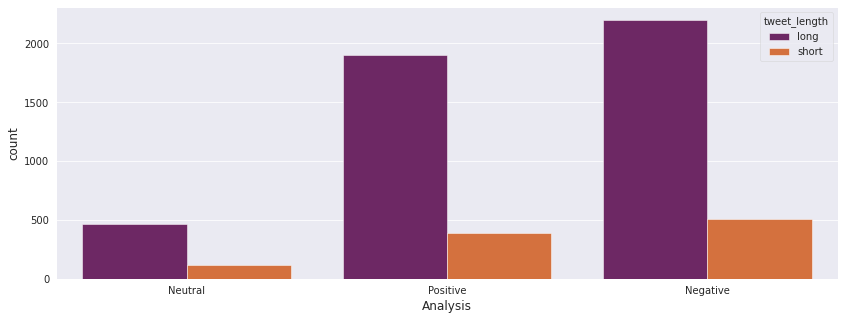

In [ ]:
df_copy2.drop_duplicates(subset=['tweet'])
df3['insult']=df_copy2['insult']
df3['target']=df_copy2['target']
df3['med']=df_copy2['med']
df3['tweet_length']=df_copy2['tweet_length']
#==== 
plt.figure(figsize=(14,5))
sns.countplot(x='Analysis',data=df3,hue='tweet_length',palette="inferno")

**Media in Sentiments**

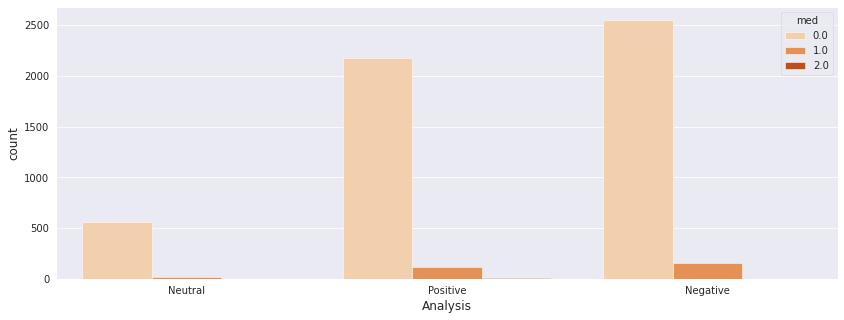

In [ ]:
plt.figure(figsize=(14,5))
sns.countplot(x='Analysis',data=df3,hue='med',palette="Oranges")

# **ADVANCED ANIMATED TARGET CARDS**

**Shows Top Targets in Trump insult Tweets and how Trump insult them**

In [ ]:
from IPython.core.display import HTML
HTML('''<div class="flourish-embed flourish-cards" data-src="visualisation/5123150"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

# **Kesimpulan**


* Sebagian besar Tweet Penghinaan tentang Berita Palsu dan Demokrat

* Trump menggunakan Ekspresi sarkastik untuk menghina Orang lain atau situasi ( Crooked Hillary - Sleepy Joe - Witch Hunt )

* 25% tweet penghinaan truf memiliki lebih dari 2 penghinaan

* Tweet memiliki lebih banyak penghinaan ketika Trump berbicara tentang media dan surat kabar

* Trump menggunakan penghinaan sebagai gaya untuk membela orang atau institusi mana pun

* 85% tweet penghinaan Trump Panjangnya panjang

* hanya 10% dari tweet penghinaan Trump yang tidak memiliki media

* Kebanyakan orang menargetkan Hillary Clinton, Joe Biden dan Adam Schiff

* Lebih banyak tweet penghinaan dimulai dari 2017

* Trump mengetik lebih banyak tweet penghinaan di akhir pekan

* Trump mengetik lebih banyak tweet penghinaan di kuartal terakhir tahun ini

* Trump paling menghina surat kabar dan demokrasi

* 50% dari tweet adalah Negatif

* Trump menulis lebih banyak tweet negatif yang menghina pada tahun 2018

